## Lab - Emotion Detection with Machine Learning

### Introduction

Welcome to the Emotion Detection Lab! In this activity, you'll explore the fascinating world of **artificial intelligence** and **machine learning** by building a model that can recognize human emotions from facial expressions.

**What you'll learn:**
- How machine learning models learn from data
- The process of training a neural network
- How to evaluate model accuracy
- How to test your model with real images

**By the end of this lab**, you'll have a working emotion detector that can identify 7 different emotions: Angry, Disgust, Fear, Happy, Neutral, Sad, and Surprise!

### Part 0 - Background Research

Before diving into the code, let's explore the concepts behind emotion detection and machine learning.

To answer the questions, edit the markdown cell and put your answer below the question.

**Make sure to save the markdown cell by pressing the ✓ (check) icon in the top right after answering the questions**

##### Question 00
What is machine learning, and how is it different from traditional programming?
- **Answer:** its different because it uses data you feed it to make different decisions whike programming is directly ordering the computer to make these decisions and you have specified rules to the program.

##### Question 01
What is a neural network? Why do you think it's called "neural"?
- **Answer:** its called a neural network because the way the data is stored is inspired or designed to be like the neurons in the human brain

##### Question 02
Research facial emotion recognition. What are some real-world applications of this technology?
- **Answer:** some real world applications is to use t for safety in cars to recognize danger or concern in or used for therapy to detect certain emotions in people and what they're thinking 

##### Question 03
What are some potential ethical concerns with emotion detection AI?
- **Answer:** the ethical concerns is that is done incorrectly and detects the wrong emotion it could cause problems if wrongly detected

### Part 1 - Setting Up Our Environment

First, we need to import the libraries (tools) we'll use to build our emotion detector. Think of these as different toolkits - some for working with numbers, some for creating visualizations, and some specifically designed for machine learning.

#### 1.0 - Installing Required Libraries

Before we can import our libraries, we need to make sure they're installed. Run these commands in your terminal:

```bash
pip3 install numpy matplotlib tensorflow keras kagglehub scipy
```

**Note:** This might take a few minutes. Tensorflow is a large library!

#### 1.1 - Importing Libraries

Now let's import all the tools we'll need:

In [22]:
import os                       # For working with files and folders

# Basic data manipulation and math
import numpy as np              # For working with arrays and numbers

# Visualization tools
import matplotlib.pyplot as plt # For creating plots and charts

# Machine Learning and Neural Networks
import tensorflow as tf         # Google's machine learning framework
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras import regularizers

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


##### Question 04
Look at the imports above. Which library do you think is responsible for the actual "machine learning" part?
- **Answer:**  i think tensorflow library is used for the machine learning

##### Question 05
We import several tools from keras and tensorflow. Why do you think we need multiple tools instead of just one library?
- **Answer:** to have the most efficient and optimal machine learning program

#### 1.2 - Downloading the Dataset

Now we need to download the emotion detection dataset from Kaggle. This dataset contains thousands of facial images labeled with different emotions.

**First, install kagglehub** (if you haven't already):
```bash
pip3 install kagglehub
```

In [23]:
# Run this cell to download the dataset


import kagglehub

# Download latest version of the FER emotion detection dataset
path = kagglehub.dataset_download("ananthu017/emotion-detection-fer")

print("Path to dataset files:", path)
print("\n✅ Dataset downloaded successfully!")

Path to dataset files: /Users/cohort24/.cache/kagglehub/datasets/ananthu017/emotion-detection-fer/versions/1

✅ Dataset downloaded successfully!


💡 **Note:** The download might take a few minutes depending on your internet connection. The dataset is several hundred megabytes!

### Part 2 - Understanding Our Dataset

Machine learning models learn from data. Our dataset contains thousands of facial images labeled with different emotions. The model will study these images to learn what patterns (like eyebrow positions, mouth shapes) correspond to each emotion.

#### 2.0 - Setting Up Data Paths

Now we need to tell our program where to find the training and testing images. The dataset was just downloaded in the previous step!

In [24]:
# Set up paths to the training and testing data
# The 'path' variable was created when we downloaded the dataset
train_dir = os.path.join(path, "train")
test_dir = os.path.join(path, "test")

# Image size - all images will be resized to 48x48 pixels
img_size = 48

print(f"📁 Training data location: {train_dir}")
print(f"📁 Testing data location: {test_dir}")

📁 Training data location: /Users/cohort24/.cache/kagglehub/datasets/ananthu017/emotion-detection-fer/versions/1/train
📁 Testing data location: /Users/cohort24/.cache/kagglehub/datasets/ananthu017/emotion-detection-fer/versions/1/test


##### Question 06
Why do you think all images need to be the same size (48x48 pixels) for machine learning?
- **Answer:** so it can be compared easier and it can consistently do so 

##### Question 07
We have separate folders for "train" and "test" data. Why do you think we split our data this way instead of using all images for training?
- **Answer:** so we can have specified data for training and test and so it could be easily identified between the two 

#### 2.1 - Data Augmentation

**Data augmentation** is a technique where we create slightly modified versions of our training images. This helps our model learn better by seeing each face from slightly different perspectives.

Think of it like this: if you only studied math problems written in one handwriting style, you might struggle with problems written differently. Data augmentation helps our model generalize better!

In [25]:

from tensorflow.keras.optimizers import Adam# Augmentation for training data - we modify these images to create variety
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,      # Shift image 10% left/right
    height_shift_range=0.1,     # Shift image 10% up/down
    horizontal_flip=True,       # Randomly flip horizontally
    rescale=1./255,             # Scale pixel values to 0-1 range
    validation_split=0.2        # Use 20% for validation
)

# For validation data - we only rescale, no augmentation
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

print("✅ Data augmentation configured!")

✅ Data augmentation configured!


##### Question 08
We use `horizontal_flip=True` for data augmentation. Would it make sense to use `vertical_flip` (upside down) for facial emotion detection? Why or why not?
- **Answer:**  i guess since it would be able to pick up the emotion both up and down with vertical flip.

##### Question 09
What does `rescale=1./255` do? Why is it helpful to scale pixel values?
- **Answer:** it Scales pixel values to 0-1 range its helpful to accurately scale the pixel values by scaling its range

#### 2.2 - Loading the Data

Now we'll load the actual images from our folders and apply the augmentation we configured.

In [26]:
# Load training images
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_size, img_size),  # Resize all images to 48x48
    batch_size=64,                      # Process 64 images at a time
    color_mode="grayscale",             # Use black & white images (simpler than color)
    class_mode="categorical",           # We have multiple emotion categories
    subset="training"                   # This is training data
)

# Load validation images
validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation"
)

print("\n✅ Data loaded successfully!")
print(f"📊 Training samples: {train_generator.samples}")
print(f"📊 Validation samples: {validation_generator.samples}")
print(f"\nEmotion classes: {list(train_generator.class_indices.keys())}")

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.

✅ Data loaded successfully!
📊 Training samples: 22968
📊 Validation samples: 1432

Emotion classes: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


##### Question 10
Look at the output above. How many total images are in the training set? How many in the validation set?
- **Answer:** there are 22968 in the training set and there are 1432 in the validation set 

##### Question 11
We use `color_mode="grayscale"` (black and white) instead of color. What might be an advantage of using grayscale for this task?
- **Answer:** easier to detect through light then color thats an advantage grey scale might have.

##### Question 12
Notice that our images are organized into folders with emotion names (like "happy", "sad", etc.), and each image is labeled with its emotion. This is called **supervised learning** because we're teaching the model using labeled examples. How is this different from **unsupervised learning**, where the model finds patterns without labels? Why do you think we need labeled data for emotion detection?
- **Answer:** so it can identify the certain emotions based on the specifed label on the data


#### 2.3 - Analyzing the Dataset Distribution

Before we build our model, it's important to understand what data we're working with. Let's visualize how many images we have for each emotion.

**Why does this matter?** If our dataset has way more images of one emotion than another, the model might become biased!

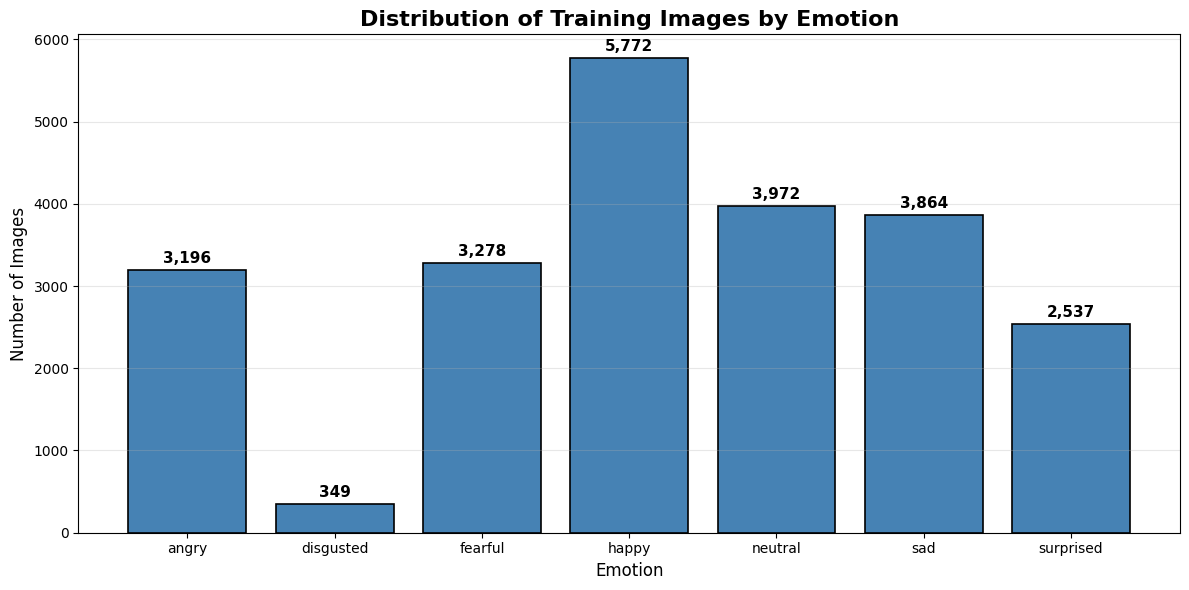

In [27]:
# Run this cell to visualize the training dataset


# Get the count of images for each emotion class
emotion_counts = {}
for emotion_name, class_index in train_generator.class_indices.items():
    count = sum(train_generator.classes == class_index)
    emotion_counts[emotion_name] = count

# Sort by emotion name for consistent display
emotions = sorted(emotion_counts.keys())
counts = [emotion_counts[emotion] for emotion in emotions]

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(emotions, counts, color='steelblue', edgecolor='black', linewidth=1.2)
plt.title('Distribution of Training Images by Emotion', fontsize=16, fontweight='bold')
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add count labels on top of bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
             f'{count:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

##### Question 13
Looking at the bar chart above, which emotion has the MOST training images? Which has the LEAST?
- **Answer:** happy is the emotion that has the most training images and sad is the emotion that has the least images.

##### Question 14
If one emotion has significantly more images than another, how might this affect the model's performance? Will it be equally good at recognizing all emotions?
- **Answer:** it might look primarily for the  emotions with higher images or it may detect those emotions more easier than the others because theres so much reference.

##### Question 15
Based on the distribution, which emotion(s) do you predict the model will be BEST at detecting? Which might it struggle with? Explain your reasoning.
- **Answer:** it would probably be best at detecting happy emotion because theres more data around it based on the amount of images meaning it has more reference to look on when detecting the emotion.

##### Question 16
If you were building this dataset, why might it be challenging to collect equal numbers of images for each emotion? (Think about which emotions people naturally express more often)
- **Answer:** because some emotions people rarely express and finind references for niche emotion may be difficult collect an even number of in comarison to largely felt emotions like happy.

### Part 3 - Building the Neural Network

Now we'll build our neural network - the "brain" of our emotion detector!

**What you need to know:**
- A neural network is made up of layers that work together to recognize patterns
- Each layer looks for different features (edges, shapes, facial features)
- The network learns by adjusting itself to make better predictions

**The good news:** You don't need to understand every detail of how the network works - that's advanced computer science! The important part is understanding what the network does overall and how to train it.

Think of it like driving a car - you don't need to know how the engine works to drive successfully!

#### 3.0 - Creating the Model

The code below creates our neural network. It's pre-built for you! 

**What's happening (simplified):**
- The network has multiple layers that process the image
- Early layers detect simple patterns (like edges)
- Later layers detect complex patterns (like facial features)
- The final layer makes a decision about which emotion it sees

Just run the cell - the details aren't the focus of this activity!

In [28]:
# Run this cell to create the neural network model

# Create a Sequential model (layers stacked one after another)
model = tf.keras.models.Sequential()

# Layer 1-2: Look for basic patterns (edges, lines)
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', 
                 input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Layer 3: Look for shapes and curves
model.add(Conv2D(128, (5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Layer 4-5: Look for complex facial features
model.add(Conv2D(512, (3,3), padding='same', activation='relu', 
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding='same', activation='relu', 
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Decision layers: Combine patterns and make predictions
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Output layer: Gives probability for each of the 7 emotions
model.add(Dense(7, activation='softmax'))

print("✅ Neural network created!")

/Users/cohort24/Library/Python/3.10/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Neural network created!


##### Question 17
The neural network was created for you. Why do you think we have 7 outputs in the final layer?
- **Answer:** there are 7 outputs because there are 7 emotions that was submitted scanned to be outputted  

#### 3.1 - Configuring the Model

Before training, we need to configure how the model learns:

In [29]:
# Configure the learning process

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model configured and ready to train!")

✅ Model configured and ready to train!


#### 3.2 - Model Summary (Optional)

If you're curious about the model's structure, you can view a summary:

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,496,903 (17.15 MB)

 Trainable params: 4,492,935 (17.14 MB)

 Non-trainable params: 3,968 (15.50 KB)

💡 **Note:** The model has millions of parameters (numbers) that need to be learned during training. That's why we need lots of training data!

### Part 4 - Training the Model

This is where the magic happens! The model will look at thousands of facial images and gradually learn to recognize patterns associated with each emotion.

**What happens during training:**
1. Model looks at a batch of images and makes predictions
2. Compares predictions to correct answers
3. Adjusts its internal parameters to be more accurate
4. Repeats for many epochs (complete passes through the data)

**⚠️ Important:** Training will take a while (potentially 30+ minutes depending on your computer). You can reduce the number of epochs if needed.

#### 4.0 - Setting Training Parameters

In [31]:
# Training configuration
epochs = 60        # Number of complete passes through the training data
batch_size = 64    # Number of images processed at once

##### Question 18
What is an "epoch"? Why do we need multiple epochs instead of just one pass through the data?
- **Answer:** an epoch is the number of complete passes through the training data we need more than one because multiple oututs and inputs of data that needed to be past through

#### 4.1 - Training the Model

Now let's train! Watch the accuracy increase over time. The model is learning!

In [32]:
# Start training
print("🚀 Starting training...\n")

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    verbose=1  # Show progress
)

print("\n✅ Training complete!")

🚀 Starting training...

Epoch 1/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 205s 561ms/step - accuracy: 0.1928 - loss: 9.2687 - val_accuracy: 0.2514 - val_loss: 8.6598
Epoch 2/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 198s 550ms/step - accuracy: 0.2284 - loss: 8.1988 - val_accuracy: 0.2919 - val_loss: 7.3988
Epoch 3/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 196s 546ms/step - accuracy: 0.2495 - loss: 7.1507 - val_accuracy: 0.3017 - val_loss: 6.4387
Epoch 4/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 194s 540ms/step - accuracy: 0.2804 - loss: 6.1433 - val_accuracy: 0.3115 - val_loss: 5.5517
Epoch 5/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 193s 539ms/step - accuracy: 0.3092 - loss: 5.2500 - val_accuracy: 0.3631 - val_loss: 4.6897
Epoch 6/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 193s 537ms/step - accuracy: 0.3424 - loss: 4.4945 - val_accuracy: 0.4071 - val_loss: 4.0190
Epoch 7/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 193s 537ms/step - accuracy: 0.3718 - loss: 3.8651 - val_accuracy: 0.4630 - val_loss: 3.3715
Epoch 8/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 193s 539ms/s

##### Question 19
Look at the training output above. Did the accuracy increase from the first epoch to the last epoch? By approximately how much?
- **Answer:** yes the accuracy increased from the first to last epoch the increase was from 0.2514 to 0.6711

##### Question 20
You should see two accuracy values each epoch: training accuracy and validation accuracy. Why is the validation accuracy usually lower than training accuracy?
- **Answer:** validation accuracy is probably lower because its processed less or last from the regular accuracy making it less accurate 

#### 4.2 - Visualizing Training Progress

Let's create graphs to see how our model improved during training:

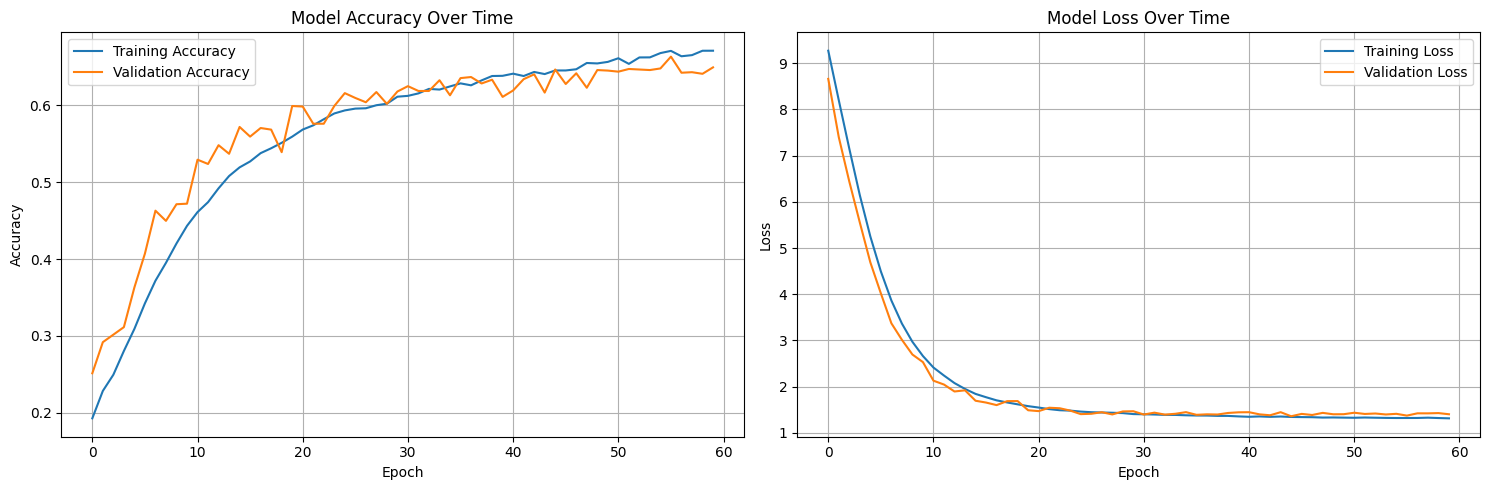

📊 Training history visualized!


In [34]:
# Create two subplots: one for accuracy, one for loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy Over Time')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss Over Time')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print("📊 Training history visualized!")

##### Question 21
Look at the accuracy graph. Does the accuracy reach a plateau (flatten out), or is it still improving at the end?
- **Answer:** the training they both  flatten out near the end but the but the accuracy from the beginning does not go down consistently

##### Question 22
The "loss" represents how wrong the model's predictions are (lower is better). Describe the shape of the loss curve. What does it tell you about the model's learning?
- **Answer:** the loss curve starts at the top take a steep slope of a drop then flattens out near the end 

### Part 5 - Evaluating the Model

Now that training is complete, let's see how well our model performs on data it has never seen before!

#### 5.0 - Testing on Validation Data

In [35]:
# Evaluate on training data (data the model has seen)
train_loss, train_acc = model.evaluate(train_generator)

# Evaluate on test data (data the model has NOT seen)
test_loss, test_acc = model.evaluate(validation_generator)

print("\n" + "="*50)
print("📊 FINAL RESULTS")
print("="*50)
print(f"Training Accuracy:   {train_acc*100:.2f}%")
print(f"Validation Accuracy: {test_acc*100:.2f}%")
print("="*50)

# Calculate overfitting
overfitting = train_acc - test_acc
if overfitting > 0.1:
    print(f"\n⚠️  Warning: Model may be overfitting (difference: {overfitting*100:.2f}%)")
else:
    print(f"\n✅ Model generalization looks good! (difference: {overfitting*100:.2f}%)")

359/359 ━━━━━━━━━━━━━━━━━━━━ 43s 120ms/step - accuracy: 0.7196 - loss: 1.1894
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.6494 - loss: 1.4032

📊 FINAL RESULTS
Training Accuracy:   71.96%
Validation Accuracy: 64.94%

✅ Model generalization looks good! (difference: 7.02%)


##### Question 23
What was your final validation accuracy? How does it compare to random guessing (which would be about 14.3% for 7 emotions)?
- **Answer:** my final validation accuracy was 64.94 it would be a wide difference from random guessing

##### Question 24
Is there a big difference between training accuracy and validation accuracy? What might this indicate about the model?
- **Answer:**not really its a pretty small difference this might indicated that the model may prioritize training accuracy over validation but not by a large degree

#### 5.1 - Saving the Model

Let's save our trained model so we don't have to retrain it every time!

In [36]:
# Save the model weights
model.save_weights('emotion_detector.weights.h5')
print("✅ Model weights saved to 'emotion_detector.weights.h5'")

# To load the model later, you would use:
# model.load_weights('emotion_detector.weights.h5')

✅ Model weights saved to 'emotion_detector.weights.h5'


Create a file called `.gitignore` and put the name of the model weights file (`emotion_detector.weights.h5`) to make sure it is not uploaded to GitHub. 

This file is too large to be sent to GitHub

### Part 6 - Testing With Your Own Images!

This is the fun part - let's test our emotion detector with real images! You can use:
- Photos from the test dataset
- Your own photos
- Photos you find online

**Image requirements:**
- Should clearly show a face
- Face should be well-lit
- Works best with frontal faces (not profile views)

#### 6.0 - Setting Up Emotion Labels

In [37]:
# Create a dictionary mapping numbers to emotion names
label_dict = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Neutral',
    5: 'Sad',
    6: 'Surprise'
}

print("✅ Emotion labels configured")
print("\nEmotions our model can detect:")
for key, value in label_dict.items():
    print(f"   {key}: {value}")

✅ Emotion labels configured

Emotions our model can detect:
   0: Angry
   1: Disgust
   2: Fear
   3: Happy
   4: Neutral
   5: Sad
   6: Surprise


#### 6.1 - Loading and Processing an Image

**TODO:** Update the image path below to test with your own image!

In [12]:
# TODO: Change this to your image path
image_path = "path/to/your/img.jpg"

# Load and preprocess the image
img = image.load_img(image_path, color_mode="grayscale", target_size=(img_size, img_size))

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title("Test Image")
plt.axis('off')
plt.show()

print("✅ Image loaded successfully")

NameError: name 'image' is not defined

#### 6.2 - Making a Prediction

In [ ]:
# Convert image to array and preprocess
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array.reshape(1, 48, 48, 1)    # Reshape to match model input
img_array = img_array / 255.0                   # Normalize pixel values

# Make prediction
result = model.predict(img_array)
result_list = list(result[0])

print("\n" + "="*50)
print("🔮 PREDICTION RESULTS")
print("="*50)
print("\nProbability for each emotion:")
for i, prob in enumerate(result_list):
    print(f"   {label_dict[i]:<10} : {prob*100:5.2f}%")

# Find the emotion with highest probability
img_index = result_list.index(max(result_list))
predicted_emotion = label_dict[img_index]
confidence = max(result_list) * 100

print("\n" + "="*50)
print(f"🎯 PREDICTED EMOTION: {predicted_emotion}")
print(f"💪 Confidence: {confidence:.2f}%")
print("="*50)

##### Question 25
Test your model with at least 3 different images. Record the results:
- Image 1: Actual emotion: ______ | Predicted emotion: ______ | Confidence: ______
- Image 2: Actual emotion: ______ | Predicted emotion: ______ | Confidence: ______
- Image 3: Actual emotion: ______ | Predicted emotion: ______ | Confidence: ______

##### Question 26
How accurate was your model on these test images? Were there any surprising results?
- **Answer:**

##### Question 27
Look at the probability percentages for all emotions. Even when the model is confident, do other emotions sometimes have non-zero probabilities? What might this tell you about how the model works?
- **Answer:**

##### Question 27b (Connecting back to Part 2.3)
Look back at your answer to Question 15 about the data distribution. Did the model perform better on emotions that had more training images? Compare your prediction to the actual results.
- **Answer:**

#### 6.3 - Visualizing Predictions (OPTIONAL)

Let's create a bar chart showing the probabilities for all emotions:

In [ ]:
# Create bar chart of predictions
emotions = list(label_dict.values())
probabilities = [p * 100 for p in result_list]

plt.figure(figsize=(10, 6))
bars = plt.bar(emotions, probabilities, color='skyblue')

# Highlight the predicted emotion
bars[img_index].set_color('green')

plt.title('Emotion Detection Probabilities', fontsize=16, fontweight='bold')
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Probability (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for i, (bar, prob) in enumerate(zip(bars, probabilities)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{prob:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Part 7 - Reflection and Analysis

Now that you've built, trained, and tested your emotion detector, let's reflect on what you learned.

##### Question 28
Describe the complete machine learning process you went through in this lab (from data loading to making predictions).
- **Answer:**

##### Question 29
What factors do you think might affect the accuracy of emotion detection? (Think about image quality, lighting, facial expressions, etc.)
- **Answer:**

##### Question 30
If you wanted to improve this model's performance, what are some things you could try? (Consider: more data, different architecture, more training time, etc.)
- **Answer:**

##### Question 31
This model was trained on a specific dataset. Do you think it would work equally well on people of all ages, ethnicities, and cultures? Why or why not?
- **Answer:**

##### Question 32
Think about the ethical implications: Should emotion detection AI be used in schools, workplaces, or public spaces? What are the potential benefits and concerns?
- **Answer:**

### Conclusion

Congratulations! 🎉 You've successfully:
- Built a convolutional neural network from scratch
- Trained a machine learning model on thousands of images
- Evaluated model performance
- Made predictions on real images
- Explored the ethical implications of AI

You now have hands-on experience with one of the most exciting areas of artificial intelligence!

**Key Takeaways:**
- Machine learning models learn patterns from data
- Neural networks consist of layers that detect increasingly complex patterns
- Training requires large datasets and computational power
- Model evaluation is crucial to ensure generalization
- AI technology raises important ethical questions

**Remember:** This is just the beginning of your AI journey. Keep exploring, experimenting, and learning!

---
### Resources for Further Learning

- **TensorFlow Tutorials**: https://www.tensorflow.org/tutorials
- **Keras Documentation**: https://keras.io/
- **Deep Learning Specialization**: https://www.coursera.org/specializations/deep-learning
- **Papers with Code**: https://paperswithcode.com/

---